Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import json
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner


In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
btc_data = btc_response.json()
#print(json.dumps(btc_data, indent=4))
btc_price = float (btc_data["data"]["1"]["quotes"]["USD"]["price"])
print(btc_price)
 
    
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
eth_data = eth_response.json()
#print (json.dumps(eth_data, indent=4))
eth_price = float (eth_data["data"]["1027"]["quotes"]["USD"]["price"])
print (eth_price)
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

48481.0
3279.86
The current value of your 1.2 BTC is $58177.20
The current value of your 5.3 ETH is $17383.26


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = "PKEPTYALQ9KHNE6HF6TW"
alpaca_secret_key = "tkKWWcdb127XDrg654vNiMv3n3OqTDrs6tgsjdHG"
# Create the Alpaca API object


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
    
    

).df



# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-06-25 00:00:00-04:00  115.11  115.13  114.7516  114.89  3987588  425.9   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [9]:
# Pick AGG and SPY close price
agg_close_price = 114.89
spy_close_price = 426.57

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


## Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# 1st - create dictionary that houses the sum of BTC & ETH also the sum of SPY & AGG
total_portfolio_dictionary = {"Amount": [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
#2nd - Create saving dataframe including the above variable
df_savings = pd.DataFrame(total_portfolio_dictionary, index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,75560.458
Shares,44306.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

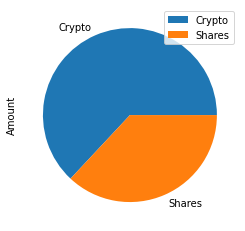

In [12]:
# Plot savings pie chart
df_savings.plot(kind= "pie", subplots=True)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print('CONGRATS!! you have more than 3 months of savings in your emegency fund.')
elif total_savings < emergency_fund:
    print('YOU"RE ON THE WAY!! you have 3 months of emergency funds available')
else:
    print(f'Don"t fret you"re just ${emergency_fund - total_savings} away from your goal!')

CONGRATS!! you have more than 3 months of savings in your emegency fund.


## Part 2 - Retirement Planning

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date

).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5022944   

                               SPY                                     
                              open     high     low   close    volume  
time                                                                   
2021-03-17 00:00:00-04:00  394.530  398.120  393.30  397.22  61876016  
2021-03-18 00:00:00-04:00  394.475  396.720  390.75  391.41  98794050  
2021-03-19 00:00:00-04:00  389.880  391.569  387.15  389.50  93819590  
2021-03-22 00:00:00-04:00  390.030  394.070  389.97  392.54  61372559  
2021-03-23 00:00:00-04:00  391.910  393.460  388.66  389.59  78167035

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [22]:
# Printing the simulation input data
Thirty_Year_Port.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5022944   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-17 00:00:00-04:00          NaN  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   
2021-03-19 00:00:00-04:00     0.000705  389.880  391.569  387.15  389.50   
2021-03-22 00:00:00-04:00     0.002203  390.030  394.070  389.97  392.54   
2021-03-23 00:00:00-04:00     0.002549  391.910  393.460  388.66  389.59   

                                                  
                             volume daily_return  
time                                              
2021-03-17 00:00:00-04:00  61876016          NaN  
2021-03-18 00:00:00-04:00  98794050    -0.014627  
2021-03-19 00:00:00-04:00  93819590    -0.004880  
2021-03-22 00:00:00-04:00  61372559     0.007805  
2021-03-23 00:00:00-04:00  78167035    -0.007515

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008655,0.999787,1.005116,0.999945,0.999948,1.002662,0.995551,0.991114,1.005594,0.995665,...,0.995788,1.005517,1.003043,1.003622,1.001764,1.004011,1.008628,1.002093,1.000623,1.000456
2,1.008302,0.996259,1.009179,1.000944,1.000077,1.004330,0.998385,0.996889,1.010009,0.993084,...,0.992236,1.006803,1.005228,1.003553,1.005048,1.001648,1.005298,1.007283,0.998955,0.997094
3,1.015631,0.995473,1.009295,0.999729,0.999797,1.006202,1.001190,1.001692,1.010433,0.994103,...,0.988273,1.004525,1.007819,1.001374,1.012900,1.005810,1.005236,1.004772,0.990027,0.999192
4,1.016650,0.993382,1.004657,1.006256,1.004037,0.995645,0.997985,1.001419,1.010087,0.990075,...,0.990230,1.008723,1.004572,1.000728,1.016044,1.009077,1.016657,1.005201,0.987376,1.002313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,109.395850,92.740585,161.937546,153.988670,113.984228,86.381376,139.576990,58.671452,148.866390,124.671734,...,89.249214,130.592907,119.574944,223.045310,154.639987,137.778718,121.263537,138.835778,175.409239,269.483453
7557,109.550070,92.621628,161.982195,154.414429,114.950388,86.838535,139.371903,58.459512,150.115554,124.389432,...,89.180582,130.735399,119.397026,223.905097,155.671642,137.792966,122.236225,139.550075,175.683548,268.072510
7558,109.828222,92.443881,161.573047,154.767494,115.256584,87.238214,139.916772,58.482404,150.425642,124.790876,...,88.471871,131.449598,119.473796,224.154531,156.657915,138.173450,121.904568,140.049133,176.593808,267.906211
7559,109.503637,92.616577,161.989618,155.221454,115.121782,87.310770,140.462689,58.682186,150.587005,124.664078,...,88.285020,131.874176,120.233265,223.604178,156.232474,139.181179,122.443291,139.637886,176.505602,267.934294


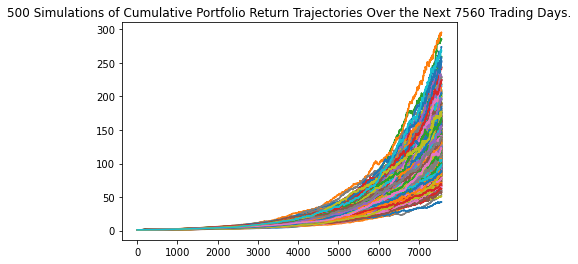

In [24]:
# Plot simulation outcomes
line_plot = Thirty_Year_Port.plot_simulation()

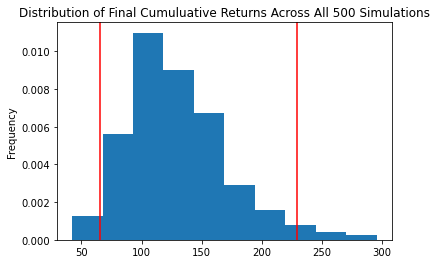

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = Thirty_Year_Port.plot_distribution()

## Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Thirty_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean            129.207180
std              41.490445
min              42.356411
25%              98.937907
50%             122.337124
75%             152.822486
max             295.245197
95% CI Lower     65.843211
95% CI Upper    228.785207
Name: 7560, dtype: float64


## The expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1316864.21 and $4575704.13


## The expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1975296.32 and $6863556.2


# Early Retirement

#### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Five_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 80,
    num_trading_days = 252 * 5
) 
#500 Simulations over 30 years approx. 17 per year, take the output and multiply by new years accounted. 80 simulations approx.

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Thirty_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997640,1.004729,0.995356,1.007589,1.001717,1.006274,1.000107,0.997867,0.993584,1.000701,...,0.997127,1.000442,1.005400,1.001915,1.000423,0.998136,1.004618,1.006697,0.997830,1.003978
2,0.999838,1.003443,0.997422,1.005998,1.004401,1.007840,0.997533,1.003170,0.991277,1.001985,...,0.995049,1.000976,1.005907,1.001026,1.007240,1.009471,1.005958,1.000450,1.000974,1.009019
3,1.005253,1.005579,1.004397,1.004419,1.004069,1.009116,0.998817,1.001895,0.993892,1.002688,...,0.991584,1.008562,1.004860,1.002666,1.010003,1.011723,1.006188,1.004949,1.001378,1.008343
4,1.003565,1.008009,1.001534,1.000804,1.007877,1.011096,0.996558,0.999557,0.993800,1.003206,...,0.993501,1.012447,1.003582,1.008417,1.018370,1.015451,1.007413,1.000700,0.997599,1.008377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.214668,1.815267,2.242976,2.439657,2.159451,2.385041,2.266231,2.671660,1.846176,2.261179,...,2.204373,2.252272,2.124954,1.934630,2.308735,2.057900,1.913006,1.997516,2.487830,2.297519
1257,2.210641,1.812639,2.242111,2.444530,2.170976,2.382132,2.285996,2.670944,1.857908,2.268023,...,2.198876,2.251442,2.116810,1.926089,2.308813,2.056456,1.922788,2.003964,2.497035,2.304380
1258,2.213958,1.806926,2.242469,2.436316,2.165436,2.387261,2.290889,2.680433,1.863828,2.280816,...,2.196706,2.259205,2.123308,1.929331,2.319809,2.068020,1.926557,2.006086,2.515379,2.315115
1259,2.211115,1.822772,2.248665,2.422395,2.160719,2.398701,2.285663,2.676848,1.852176,2.282598,...,2.185798,2.245363,2.129704,1.924076,2.327234,2.077182,1.942956,2.011139,2.531569,2.315338


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.


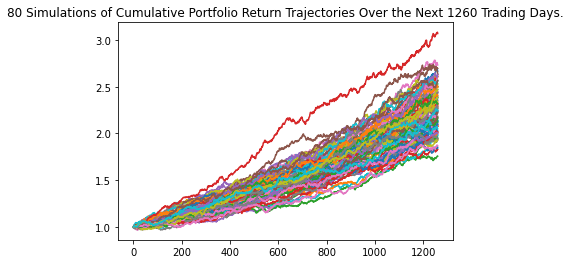

In [34]:
# Plot simulation outcomes
line_plot = Five_Year_Port.plot_simulation()

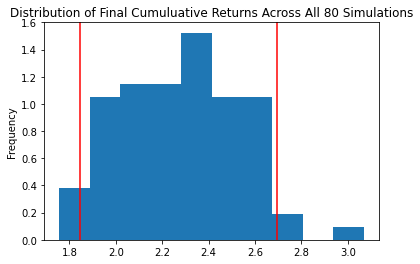

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = Five_Year_Port.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Five_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           80.000000
mean             2.283380
std              0.253290
min              1.756668
25%              2.092011
50%              2.289049
75%              2.451124
max              3.068483
95% CI Lower     1.847293
95% CI Upper     2.696193
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $92364.66 and $134809.67


#### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Ten_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 160,
    num_trading_days = 252 * 10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Ten_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008913,1.004843,1.002787,0.998668,1.003354,0.994607,1.001878,1.001416,1.003493,0.994589,...,0.995664,1.000073,1.001488,1.000072,0.999627,1.004352,1.004067,0.999109,0.999967,0.995200
2,1.009538,1.009897,1.000445,1.000255,1.002196,0.995002,1.004043,1.000701,1.005057,0.997789,...,0.998333,0.995352,0.996163,1.002058,1.002937,0.996636,1.006880,1.001874,1.000943,0.994633
3,1.010708,1.015286,0.998286,0.994775,1.009246,1.000799,1.005239,1.006053,1.004967,0.996237,...,0.998287,0.992839,0.993004,1.002806,1.000112,0.997831,1.000818,1.006735,1.003704,0.989746
4,1.017061,1.010573,0.999391,0.995862,1.007177,0.999573,1.003416,1.011203,1.014712,0.993376,...,0.994321,0.989091,1.004216,1.005990,0.999289,1.001079,0.999503,1.007239,0.998821,0.992187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.343425,8.093827,3.864667,5.634570,5.734586,5.316761,5.747997,4.623535,7.195345,4.838857,...,5.149295,4.200106,4.661513,3.493122,4.826625,4.289464,4.460125,4.608697,4.315469,5.660654
2517,5.335654,8.133170,3.874039,5.622664,5.753952,5.349363,5.774636,4.629987,7.218755,4.843544,...,5.120586,4.184583,4.690737,3.517799,4.849322,4.308244,4.465997,4.610892,4.298705,5.679281
2518,5.383772,8.150508,3.876319,5.591157,5.786062,5.391569,5.766272,4.641462,7.228185,4.874408,...,5.143228,4.170779,4.671879,3.541910,4.852612,4.305558,4.474063,4.639237,4.289472,5.689605
2519,5.384996,8.167868,3.876577,5.598781,5.739260,5.412483,5.790161,4.627084,7.211444,4.849323,...,5.124915,4.153331,4.687297,3.542088,4.835131,4.298343,4.452042,4.627533,4.261649,5.715990


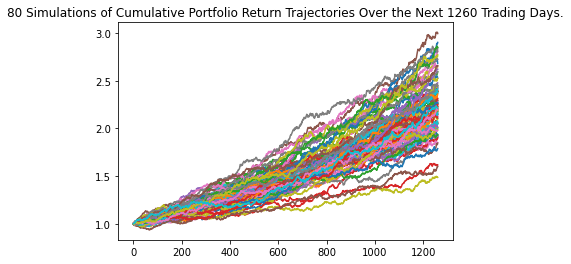

In [41]:
# Plot simulation outcomes
line_plot = Ten_Year_Port.plot_simulation()

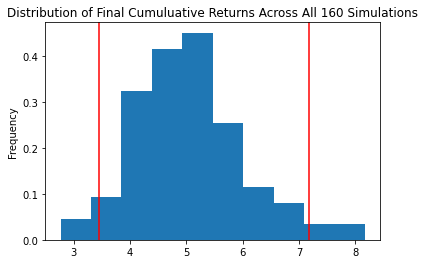

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = Ten_Year_Port.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Ten_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           160.000000
mean              5.043445
std               0.984701
min               2.765411
25%               4.380154
50%               4.985006
75%               5.623015
max               8.166589
95% CI Lower      3.445652
95% CI Upper      7.171644
Name: 2520, dtype: float64


In [44]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment, 2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $172282.59 and $358582.19
